# **Algoritmos Supervisados**

[Victor Sanchez](https://github.com/VicoSan07) <br>
Dataset: [Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality) 

### **Objetivo**

Utilizar y analizar los resultados obtenidos a tráves de distintos algoritmos supervisados con el fin de predecir una variable de interés a partir de un conjunto de variables explicativas.

### **Carga de Dataset**

In [74]:
import pandas as pd

#Carga de dataset 'vino rojo' 
dfwiner = pd.read_csv(r'C:/Users/vicos/Documents/winequality-red.csv',delimiter=";",
                      #Tipo de datos en cada columna
                      dtype={
                          'fixed acidity': float,
                          'volatile acidity': float,
                          'citric acid': float,
                          'residual sugar': float,
                          'chlorides': float,
                          'free sulfur dioxide': float,
                          'total sulfur dioxide': float,
                          'density': float,
                          'pH': float,
                          'sulphates': float,
                          'alcohol': float,
                          'quality': int,
                      })

#Carga de dataset 'vino blanco' 
dfwinew = pd.read_csv(r'C:/Users/vicos/Documents/winequality-white.csv',delimiter=";",
                      #Tipo de datos en cada columna
                      dtype={
                          'fixed acidity': float,
                          'volatile acidity': float,
                          'citric acid': float,
                          'residual sugar': float,
                          'chlorides': float,
                          'free sulfur dioxide': float,
                          'total sulfur dioxide': float,
                          'density': float,
                          'pH': float,
                          'sulphates': float,
                          'alcohol': float,
                          'quality': int,
                      })

# Crear columnas con string constante en cada fila
dfwiner['type']='red'
dfwinew['type']='white'

dfwineall = pd.concat([dfwiner,dfwinew],ignore_index=True)
dfwineall = dfwineall.drop(columns=["type"])

# Renombramos los nombres de las variables para facilitar su representación visual
dfwineall.rename(
    columns={"fixed acidity": "FA",
            "volatile acidity": "VA",
             "citric acid": "CA",
             "residual sugar": "RS",
             "chlorides": "CH",
             "free sulfur dioxide": "FSD",
             "total sulfur dioxide": "TSD",
             "density": "DE",
             "pH": "PH",
             "sulphates": "SU",
             "alcohol": "AL",
             "quality": "QU"},
    inplace=True,
)

dfwineall

,FA,VA,CA,RS,CH,FSD,TSD,DE,PH,SU,AL,QU
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### **Regresión Lineal Múltiple**

La regresión lineal múltiple es un algoritmo supervisado que pronostica una variable de interés a tráves de un conjunto de variables denominadas independientes. El modelo establecido para dicha regresión como su nombre lo indica es de cáracter lineal.

Generalmente se parte de un análisis exploratorio de los datos previo a su aplicación, en donde se analizan entidades como correlaciones, varianza, distribuciones, histogramas de las variables a utilizar. 

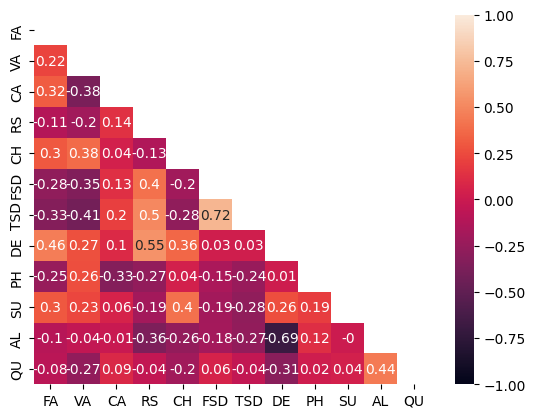

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Matriz de Correlación
dfcorr = dfwineall.corr().round(2)
mask = np.triu(np.ones_like(dfcorr, dtype=bool))
sns.heatmap(dfcorr, annot=True, vmax=1, vmin=-1, center=0, cmap='rocket', mask=mask, )
plt.show()

A partir de aquí vamos a partir los datos en 2 conjuntos: variables independientes y variable dependiente. Posteriormente partiremos estos dos conjuntos en _train_ y _test_ para evaluar el desempeño del modelo.

In [76]:
from sklearn.model_selection import train_test_split

X=dfwineall.iloc[:,:-1]
Y=dfwineall.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X.values,Y.values,test_size=0.2,random_state=0)

Aplicamos la regresión lineal

In [77]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train,Y_train)
Y_prediction=regressor.predict(X_test)


### **Regresión Lineal Múltiple con DBSCAN**


Retomemos los outliers identificados por el DBSCAN y procedamos a eliminarlos del conjunto de datos

In [78]:
from sklearn import preprocessing

# Datos escalados
dfwineall_scaled = preprocessing.StandardScaler().fit_transform(dfwineall)
dfwineall_scaled = pd.DataFrame(dfwineall_scaled) 
dfwineall_scaled = dfwineall_scaled.rename(columns = {0:'FA',1: 'VA', 2:'CA',3:'RS',4:'CH',5:'FSD',6:'TSD',7:'DE',8:'PH',9:'SU',10:'AL',11:'QU'})

In [79]:
from sklearn.cluster import DBSCAN

# DBSCAN para todo el conjunto
model_dbscanX = DBSCAN(eps=3, min_samples = 5, metric = "euclidean").fit(dfwineall_scaled)

Nuevo dataframe sin outliers

In [80]:
clusters = model_dbscanX.fit_predict(dfwineall_scaled)

dfwineclean = dfwineall.copy(deep=True)
dfwineclean['id'] = clusters

dfwineclean = dfwineclean.drop(dfwineclean[dfwineclean['id'] == -1].index)
dfwineclean = dfwineclean.drop(columns=["id"])

Nueva Regresión

In [81]:
X2=dfwineclean.iloc[:,:-1]
Y2=dfwineclean.iloc[:,-1]

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2.values,Y2.values,test_size=0.2,random_state=0)

regressor=LinearRegression()
regressor.fit(X2_train,Y2_train)
Y2_prediction=regressor.predict(X2_test)

### **Random Forest**


_Random Forest_ es un algoritmo supervisado que construye árboles de decisión de manera aleatoria, con el objetivo de combinarlos y obtener una predicción más estable y precisa. En lugar de buscar la característica más importante al dividir un nodo, busca la mejor característica entre un subconjunto aleatorio de características.

In [82]:
# Aplicación Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100)
RFR.fit(X_train,Y_train)

Y3_prediction = RFR.predict(X_test)


### **Comparativa**

In [148]:
import random

# create list of 5 random numbers
sct_indx = random.sample(range(1300), 10)
Ysamp_Obs = pd.DataFrame(Y_test[sct_indx])
Ysamp_MLR = pd.DataFrame(Y_prediction[sct_indx])
Ysamp_MLR_DB = pd.DataFrame(Y2_prediction[sct_indx])
Ysamp_RFR = pd.DataFrame(Y3_prediction[sct_indx])

resp_reg = pd.concat([Ysamp_Obs,Ysamp_MLR,Ysamp_MLR_DB,Ysamp_RFR],axis=1)
resp_reg.set_axis(['Observado', 'MLR', 'MLR*','RFR'], axis='columns')


,Observado,MLR,MLR*,RFR
0,6,5.368535,6.124591,5.86
1,8,5.952585,5.375656,7.12
2,7,6.047840,6.178584,6.49
3,6,6.648116,5.457693,6.80
4,4,5.401926,5.753593,5.43
5,6,6.374916,5.804332,6.28
6,5,5.990001,6.163332,5.81
7,6,5.992622,6.038741,5.99
8,7,6.317749,5.583624,6.57
9,6,5.665515,5.900248,5.77


### **Conclusiones**

De la muestra seleccionada, se puede observar que en el caso de las regresiones lineales existe una dificultad para aproximar puntuaciones extremas de los vinos, a primera vista aún no es clara la contribución de haber aplicado DBSCAN como paso previo a la segunda regresión, sin embargo, en capitulos posteriores se analizará el desempeño de estas técnicas a tráves de indicadores. Lo único claro hasta el momento es la mejor reacción que obtuvo la regresión por bosque aleatorio a comparación de los otros modelos.

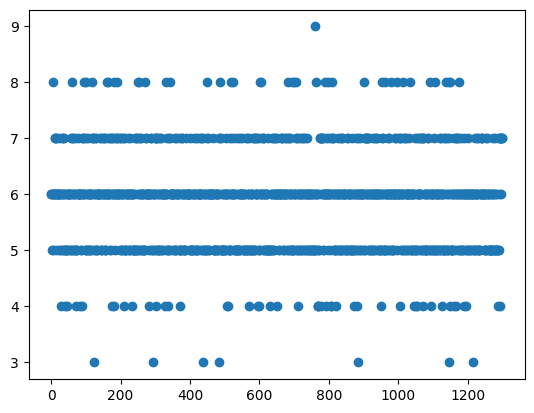

In [102]:
plt.scatter(range(1300),Y_test)
plt.show()